Logistic Regression

1) Implement logistic regression using Python to perform classification on Social_Network_Ads.csv dataset. 
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Errorrate, Precision, Recall on the given dataset.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../Datasets/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.shape

(400, 5)

In [5]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
data['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [11]:
data['Gender'].replace(['Male','Female'],[0,1], inplace=True)

C:\Users\saksh\AppData\Local\Temp\ipykernel_22296\747566003.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].replace(['Male','Female'],[0,1], inplace=True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_22296\747566003.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender']

In [12]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


<Axes: xlabel='Purchased', ylabel='count'>

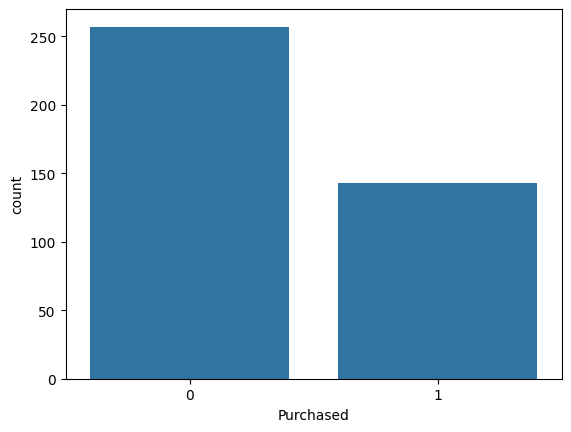

In [14]:
import seaborn as sns
sns.countplot(data=data, x=data['Purchased'])

Model Building

In [15]:
# Set features & target

X = data[['Gender','Age','EstimatedSalary']] 
Y = data['Purchased']

In [17]:
# Split data into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

C:\Users\saksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
# Prediction
Y_pred = lr.predict(X_test)

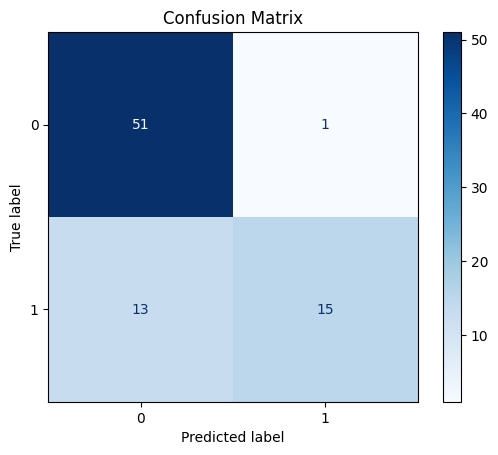

In [34]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

# Values : TP,FN,FP,TN
TP,FN,FP,TN = confusion_matrix(Y_test, Y_pred).ravel()

# Matrix Plot
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [21]:
print("TP = ",TP)
print("FP = ",FP)
print("FN = ",FN)
print("TN = ",TN)

TP =  51
FP =  13
FN =  1
TN =  15


In [23]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        52
           1       0.94      0.54      0.68        28

    accuracy                           0.82        80
   macro avg       0.87      0.76      0.78        80
weighted avg       0.85      0.82      0.81        80



In [24]:
# Accuracy
accuracy = (TP+TN)/(TP+TN+FP+FN)
error_rate = 1- accuracy

print("Accuracy: ",accuracy)
print("Error Rate: ", error_rate)

Accuracy:  0.825
Error Rate:  0.17500000000000004


In [25]:
# Precision
precision = TP/(TP+FP)
print("Precision: ", precision)

# Recall
recall = TP/(TP+FN)
print("Recall: ", recall)

# F1 Score
f1 = ( 2 * recall * precision ) / ( precision + recall )
print("F1: ", f1)

Precision:  0.796875
Recall:  0.9807692307692307
F1:  0.8793103448275861
